In [1]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time


#I/O 
now_path        =   '../BRILLOUIN/TDP43/NO_ARS_12_02/'
spectra_filename    =   'NO_ARS_12_02'
VIPA_filename       =   'NO_ARS_12_02_VIPA_quasisat.tif'
log_file            =   'log_'+spectra_filename
analysis_dir        =   'analysis/'

#operatives

#esclusi a mano
to_add              =   []

syg_kwargs          =   {'height': 119, 'distance': 31, 'width': 3.}
syg_kwargs_VIPA     =   {'distance':70, 'width': 1}
syg_kwargs_brill    =  {'height': 23, 'distance': 31, 'width': 3.}
VIPA_treshold       =   6
sat_height          =   50000
sat_width           =   13.5
almost_treshold     =   15000

#quanto mi allontano dal VIPA
pre_cut             =   False
cut                 =   True

mean_dist_01 = 37
mean_dist_23 = 34
#markov_fit
p0_normal = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.448930518e-01,  8.34614271,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
p0_brillouin = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.48930518e-01,  2.34614271e-01,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
p0_almost = np.array([ 1.07186924e-01,  7.63051819e+00,  1.33280055e-01,  1.97510814e+00,
        5.09986043e-01,  1.66616101e+00,  4.33362727e+03, -1.00496864e+01,
        1.59365161e+01,  2.77695117e-01,  6.43211621e+00])

recover_markov = False
rules_markov_bounds     =   ('positive', 0.2, 'positive', [-2,2] , 'positive', 'positive', 0.2, 0.01, 0.001,  'inf', 'inf')
#tot fit
skip_tot = False
rules_tot_bounds                   =   (0.2, 0.01, 0.01, 'positive', 'positive', [-2,2], 0.01, 0.01, 'inf', 'inf')
############



cols_smart  =  ('Co', 'Omega', 'Gamma', 'delta_position',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_basic  = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude')
cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position',  'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_position', 'delta_width',  'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_position', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

#markov_fit
p0_normal = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.448930518e-01,  8.34614271,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
p0_brillouin = np.array([ 1.07378474e-01,  7.57148558e+00,  1.49128813e-01,  1.19015861e-01,
        1.48930518e-01,  2.34614271e-01,  4.79747192e+03, -1.00904973e+01,
        1.58007162e+01,  2.11019859e-01, -3.10388495e-01])
p0_almost = np.array([ 1.07186924e-01,  7.63051819e+00,  1.33280055e-01,  1.97510814e+00,
        5.09986043e-01,  1.66616101e+00,  4.33362727e+03, -1.00496864e+01,
        1.59365161e+01,  2.77695117e-01,  6.43211621e+00])

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat


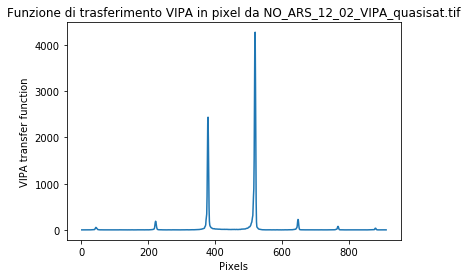

Text(0.5, 1.0, '(0, 0)')

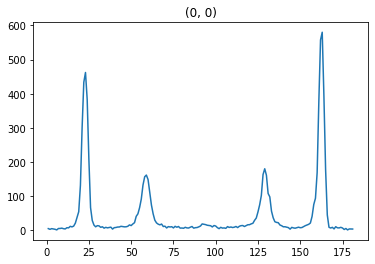

In [2]:
#0) importo dati e inizializzo oggetti
i   =   0
j   =   0
y    =   Import_from_Matlab(spectra_filename, now_path, var_name = 'y3')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = pre_cut, cut_range = (10, 175))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, now_path, fig = 'VIPA_img', save_path = now_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.title(str((i,j)))

Lo spettro è normal
Lo spettro ha 4 picchi


Text(0.5, 1.0, '(0, 0)')

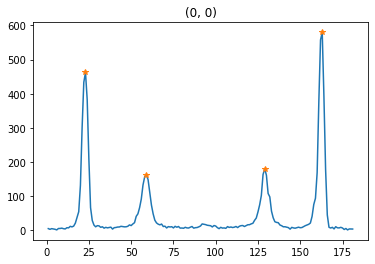

In [3]:
#1) Classificazione e visualizzazione spettro
check = Data.Check_Spectrum_Saturation(saturation_height = sat_height, saturation_width = sat_width)

if      check == 1  : nature    = 'saturo'
elif    (Data.n_peaks == 2) :

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    if (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][1]]) & (Data.y[Data.peaks['idx'][2]] > Data.y[Data.peaks['idx'][3]]):
        nature    = 'brillouin_highest_dx'
    elif (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][2]]) & (Data.y[Data.peaks['idx'][1]] > Data.y[Data.peaks['idx'][0]]):
        nature    = 'brillouin_highest_sx'
    else:
        raise ValueError ('Non ho riconosciuto lo spettro\n')

elif (Data.n_peaks == 3) :
    Data.Get_Spectrum_Peaks(**syg_kwargs_brill) 
    nature = 'brillouin_higher'

elif Data.y.max() > almost_treshold:
    nature = 'almost_height'
else:                 nature    = 'normal'
print('Lo spettro è '+nature)
print('Lo spettro ha {} picchi'.format(Data.n_peaks))
plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks['idx']], Data.y[Data.peaks['idx']], '*')
plt.title(str((i,j)))

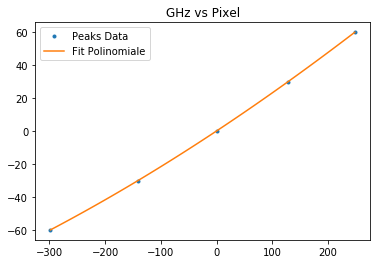

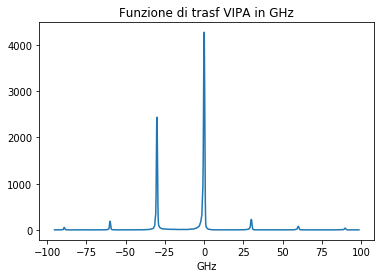

In [4]:
#2) Operazioni di conversione in GHz

Data.How_Many_Peaks_To_VIPA(treshold = VIPA_treshold, **syg_kwargs_VIPA)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)


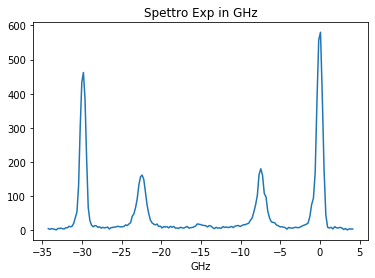

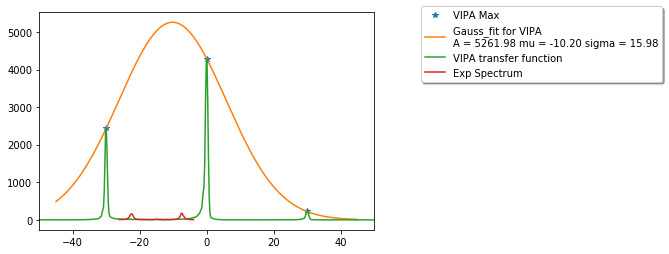

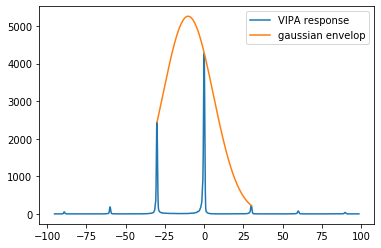

In [17]:
#3) Eseeguo taglio e stima parametri iniziali spettro, verifichepositive
from Alessandria import gaussian
Data.Align_Spectrum()
Data.Spectrum_Pix2GHz(fig = True)
Data.Cut_n_Estimate_Spectrum(estimate = True, cut = cut, mean_dist01 = mean_dist_01, mean_dist23 = mean_dist_23, verbose = True)
Data.Fit_VIPA_Gaussian(fig = True)
plt.figure()
plot(Data.x_VIPA_freq, Data.y_VIPA, label = 'VIPA response')
x = np.linspace(-30,30,1000)
plt.plot(x, gaussian(x, *Data.p0[list(cols_gauss)].values[0]), label = 'gaussian envelop')
plt.legend()

Cost before fitting = 807.4805778706441
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.0748e+02                                    2.61e+04    
       1              2         2.3899e+02      5.68e+02       1.91e+00       1.07e+04    
       2              3         1.3546e+02      1.04e+02       6.43e+02       4.82e+03    
       3              4         1.1573e+02      1.97e+01       5.73e+02       5.50e+03    
       4              5         9.0728e+01      2.50e+01       7.89e+02       5.19e+02    
       5              6         8.7016e+01      3.71e+00       1.72e+03       9.73e+01    
       6              7         8.6733e+01      2.83e-01       1.93e+03       1.81e+01    
       7              8         8.6701e+01      3.15e-02       1.96e+03       6.31e+01    
       8              9         8.6684e+01      1.72e-02       2.07e+03       1.26e+01    
       9             10         8.6683e+01      7.

,Co,Omega,Gamma,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.015005,7.477164,0.125081,0.034130,0.077308,0.133048,4.210119e+03,-10.049686,15.936516,0.133873,2.000000
StdErrs,0.022706,0.016862,0.011237,0.007891,0.020174,0.047293,8.928025e+09,23.880220,36.296184,0.016438,0.931247
Initials,0.010000,7.478667,0.100000,0.000000,0.100000,1.000000,5.261980e+03,-10.202727,15.976457,0.000000,0.000000


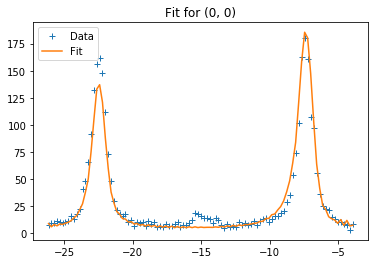

In [19]:
#3) fit markoviano
rules_markov_bound     =   ('positive', 0.2, 'positive', [-2,2], 'positive', 'positive', 0.2, 0.015, 0.0025, 'inf', [-2, 2])

Data.Get_VIPA_for_fit(mode = 'interpolate', interpolation_density = 500)

p0s = [Data.p0[list(cols_mark)].values[0], p0_almost, p0_brillouin, p0_normal]
Data.Get_Best_p0(p0s, cols_mark)
Data.Get_cost_markov(Data.p0[list(cols_mark)].values[0], columns = cols_mark)
print('Cost before fitting = {}'.format(Data.cost_markov))
Data.Get_Fit_Bounds(rules_markov_bound, cols_mark)
_= Data.Non_Linear_Least_Squares_Markov(cols_mark, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, max_nfev = 200, fig = True, zoom = False)
#_ = Data.Non_Linear_Least_Squares_Markov(bound = (Data.bounds['down'].values, Data.bounds['up'].values),  max_nfev = 500)
Data.Get_cost_markov(Data.Markov_Fit_Params.values[0], columns = cols_mark)
print('Cost after fitting = {}\n'.format(Data.cost_markov))
Data.Markov_Fit_Params

(-10, 250)

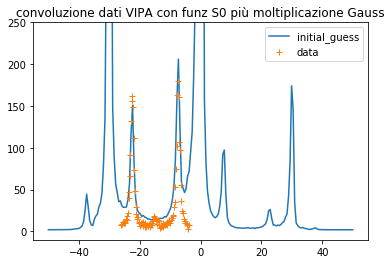

In [20]:
_ = Data.Gauss_Convolve_Markovian_Response(Data.Markov_Fit_Params.values[0], fantoccio = (-50, 50), fig = True, compare = True)
plt.ylim(-10, 250)

Co     Omega  Gamma  delta_position  delta_width  delta_amplitude  \
Values  0.01  7.478667    0.1             0.0          0.1                1   

                  A         mu      sigma  shift  offset  
Values  5261.979978 -10.202727  15.976457    0.0       0  
               Co    Omega     Gamma delta_position delta_width  \
Values  0.0150053  7.47716  0.125081      0.0341296   0.0773084   

       delta_amplitude        A       mu    sigma     shift offset  
Values        0.133048  4210.12 -10.0497  15.9365  0.133873      2  
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2368e+03                                    2.49e+02    
       1              2         2.1602e+03      7.66e+01       5.07e+00       1.93e+02    
       2              3         1.9049e+03      2.55e+02       4.90e+00       4.16e+01    
       3              4         1.8703e+03      3.46e+01       4.11e+00       3.12e+01    
     

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,shift,offset
Values,0.012004,7.402591,0.123830,35.506684,75.527665,0.034471,0.076535,0.131718,0.126868,1.000000
StdErrs,0.000750,0.392021,0.018374,2485.812020,5205.830331,0.015196,0.011816,0.005418,0.020710,0.646834
Initials,0.015005,7.477164,0.125081,0.125081,1.000000,0.034130,0.077308,0.133048,0.133873,2.000000


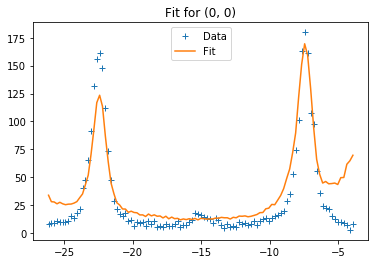

In [21]:
#4) fit totale
rules_tot_bounds                    =   (0.2, 0.01, 0.01, 'positive', 'positive', 0.01, 0.01, 0.01, 'inf', 0.5)
print(Data.p0[list(cols_mark)])
Data.Initials_Parameters_from_Markov(Data.Markov_Fit_Params, cols_mark)
print(Data.p0[list(cols_mark)])
Data.Get_Fit_Bounds(rules_tot_bounds, columns = cols_real)
p_gauss = Data.Markov_Fit_Params[list(cols_gauss)].values[0]
#Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 50)
Data.Tot_Fit_Params

(-10, 400)

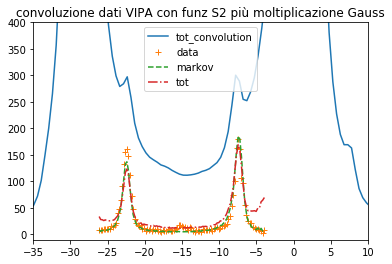

In [22]:
p0 = np.array([1.21281641e-02, 7.72206371e+00, 1.94690324e-01, 0,
       0,1.35547082e+00, 5.10605549e-01, 8.38919312e-01,
       1.82962060e-02, 1.00000000e+00])
kernel                  =       Data.VIPA_w_j/(p_gauss[0]*(np.exp(-((Data.w_j_VIPA-p_gauss[1])**2)/(2*(p_gauss[2]**2)))))
_ = Data.Convolve_Theoretical_Response(p0, p_gauss, kernel, fig = True, fantoccio = (-50, 50))
plt.plot(Data.x_freq, Data.y, '+', label = 'data')
plt.plot(Data.x_freq, Data.y_markov_fit, '--', label = 'markov')
plt.plot(Data.x_freq, Data.y_fit, '-.', label = 'tot')
plt.legend()
plt.xlim(-35, 10)
plt.ylim(-10, 400)

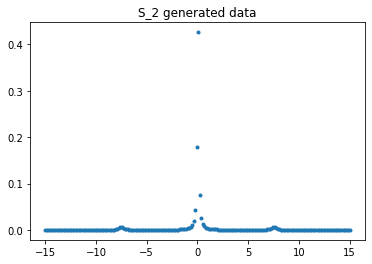

In [23]:
_ = S_2_Generate(*Data.Tot_Fit_Params.values[0][0:8], -15, 15, 200, fig = True )

In [24]:
cols_real

('Co',
 'Omega',
 'Gamma',
 'Delta',
 'tau',
 'delta_position',
 'delta_width',
 'delta_amplitude',
 'shift',
 'offset')

In [25]:
from Models import S_Dynamical_Form_Factor_2_nodelta
def S_2_Generate(Co, Omega, Gamma, Delta, tau, delta_position, delta_width, delta_amplitude, x_min, x_max, density, fig = False):

    x   =   np.linspace(x_min,x_max,  density)
    y   =   lorentian(x, delta_position, delta_width, delta_amplitude) + S_Dynamical_Form_Factor_2_nodelta(x, Co, Omega, Gamma, Delta, tau)

    
    if fig:
        
        plt.figure()
        plt.title('S_2 generated data')
        plt.plot(x,y,'.')


    return (x,y)

In [26]:
p0  = Data.p0
Markov_Fit_Params = Data.Markov_Fit_Params
p0

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.0150053,7.47716,0.125081,0.125081,1.0,0.0341296,0.0773084,0.133048,4210.12,-10.0497,15.9365,0.133873,2


In [27]:
p0[list(cols_mark)].update(Markov_Fit_Params)
p0

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.0150053,7.47716,0.125081,0.125081,1.0,0.0341296,0.0773084,0.133048,4210.12,-10.0497,15.9365,0.133873,2


In [28]:
p0

,Co,Omega,Gamma,Delta,tau,delta_position,delta_width,delta_amplitude,A,mu,sigma,shift,offset
Values,0.0150053,7.47716,0.125081,0.125081,1.0,0.0341296,0.0773084,0.133048,4210.12,-10.0497,15.9365,0.133873,2
